In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Input Parameters

## All lengths are expressed in microns

## Results are very sensitive to the branchRadius parameter

In [118]:
dendriteLength = 50 # total dendrite length in microns

nPuncta = 50 # total number of puncta in the said length of dendrite 

nBranches = 10 # total number of branches in the said length of dendrite

branchRadius = 0.5 # minimum distance in either direction from branch points to call puncta as branch coincident

iterations = 1000 # number of runs

numToPlot = 5 # randomly chosen iterations to plot from amongst all the runs

# Generate Dendrite

In [119]:
punctaLocs = []
branchPoints = []

branchLocalizedFraction = []

for i in range(iterations):

    plocs = np.random.uniform(0,dendriteLength, size = nPuncta)
    bpoints = np.random.uniform(0,dendriteLength, size = nBranches)    
    
    punctaLocs.append(plocs)
    branchPoints.append(bpoints)
    
    nCoincident = 0
    for p in plocs:
        for b in bpoints:
            dscore = abs(p-b)
            if dscore <= branchRadius:
                nCoincident += 1
                
    blocfrac  = nCoincident/nPuncta
    branchLocalizedFraction.append(blocfrac)

# Plot sample dendrites

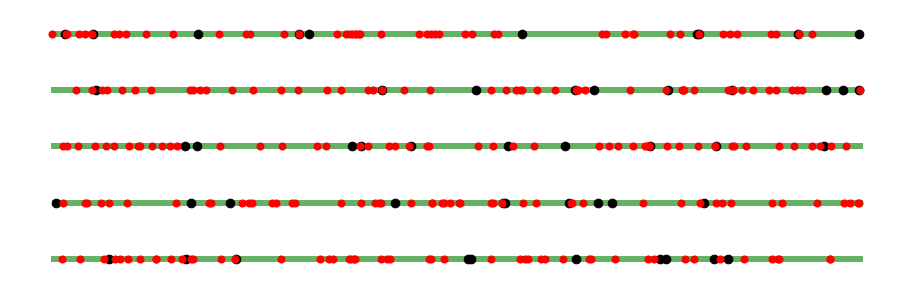

In [120]:
fig, axarr = plt.subplots(numToPlot, figsize=[16,numToPlot])

toplot = np.random.randint(0,high = iterations, size = numToPlot)

for i in range(numToPlot):
    
    axarr[i].scatter(punctaLocs[toplot[i]], np.zeros(nPuncta), s=50, color = 'red', zorder = 2)

    axarr[i].scatter(branchPoints[toplot[i]], np.zeros(nBranches), s=75, color = 'black', zorder = 1)

    axarr[i].hlines(0,0,dendriteLength, linewidth = 6, color = 'green', alpha = 0.6, zorder = 0)
    
    axarr[i].set_xticks([])
    axarr[i].set_yticks([])
    axarr[i].set_frame_on(False)

# Branch Localization Probability

20.0% of all puncta are branch localized by chance


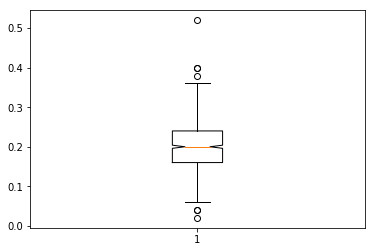

In [121]:
box = plt.boxplot(branchLocalizedFraction, 1)
print('{}% of all puncta are branch localized by chance'.format(np.median(branchLocalizedFraction)*100))